https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset/code

In [1]:
import os
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

## Explore dataset

In [2]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # normalize to [0,1] range
    return image


def load_images(images_dt, images_class_dt, directory):
    original_directory = os.getcwd()  # save current working directory
    
    os.chdir(directory)
    for image in os.listdir():
        image = tf.io.read_file(image)
        image = preprocess_image(image)
        images_dt.append(image)
        images_class_dt.append(directory.split("/")[1])

    os.chdir(original_directory) # restore original working directory

In [3]:
from PIL import Image
image_directory_angry = "archive/Angry/"
image_directory_sad = "archive/Sad/"
image_directory_happy = "archive/Happy/"
image_directory_other = "archive/Other/"

images_dt = [] # list of images
images_class_dt = [] # list of classes


load_images(images_dt, images_class_dt, image_directory_angry)
load_images(images_dt, images_class_dt, image_directory_sad)
load_images(images_dt, images_class_dt, image_directory_happy)
load_images(images_dt, images_class_dt, image_directory_other)

print("Total images in images_dt = ", len(images_dt))

Total images in images_dt =  1000


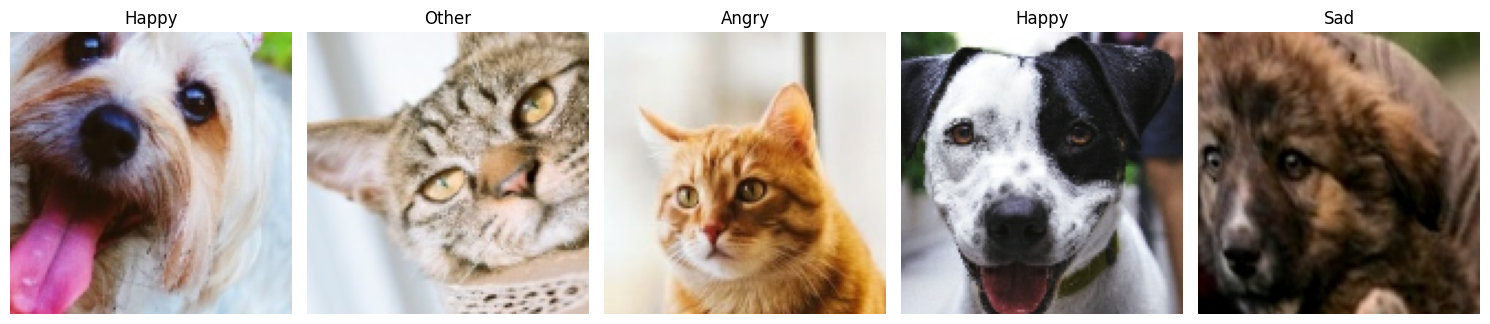

In [4]:
def display_random_images(image_array, class_array, num_images=5):
    random_indices = random.sample(range(len(image_array)), num_images)
    random_images = [image_array[i] for i in random_indices]
    random_classes = [class_array[i] for i in random_indices]

    plt.figure(figsize=(15, 10))
    for i, (image, image_class) in enumerate(zip(random_images, random_classes)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(image_class)  # Agrega la clase como título
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Llamada a la función para mostrar 5 imágenes aleatorias desde los arrays images_dt y images_class_dt
display_random_images(images_dt, images_class_dt, num_images=5)


View the quantity of happy/sad/angry cambiar el dataset i agrupar fotos en diferentas classes

In [5]:
# Transform class to numeric value
# 0: Angry, 1: Happy, 2: Sad, 3: Surprise
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la array de clases
classes_dt = label_encoder.fit_transform(images_class_dt)

In [6]:
# Convertir images_class_dt a un array NumPy para mayor consistencia
images_class_dt = np.array(classes_dt)
images_dt = np.array(images_dt)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_classes, test_classes = train_test_split(
    images_dt, images_class_dt, test_size=0.2, stratify=images_class_dt, random_state=42
)

print(train_images.shape)
print(test_images.shape)

(800, 128, 128, 3)
(200, 128, 128, 3)


## Model

In [10]:
# Definir el modelo
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [11]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train

In [12]:
# Entrenar el modelo
model.fit(train_images, train_classes, epochs=6, validation_data=(test_images, test_classes))

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_classes)
print("Accuracy:", test_accuracy)

Epoch 1/6
25/25 [==============================] - 2s 67ms/step - loss: 1.6684 - accuracy: 0.2512 - val_loss: 1.3863 - val_accuracy: 0.2300
Epoch 2/6
25/25 [==============================] - 2s 62ms/step - loss: 1.3684 - accuracy: 0.3162 - val_loss: 1.3812 - val_accuracy: 0.2550
Epoch 3/6
25/25 [==============================] - 1s 58ms/step - loss: 1.3123 - accuracy: 0.3913 - val_loss: 1.3709 - val_accuracy: 0.2800
Epoch 4/6
25/25 [==============================] - 2s 61ms/step - loss: 1.1753 - accuracy: 0.5100 - val_loss: 1.3241 - val_accuracy: 0.3850
Epoch 5/6
25/25 [==============================] - 1s 58ms/step - loss: 0.9640 - accuracy: 0.6400 - val_loss: 1.2829 - val_accuracy: 0.4250
Epoch 6/6
7/7 [==============================] - 0s 14ms/step - loss: 1.2675 - accuracy: 0.4600
Accuracy: 0.46000000834465027


## Model 2

In [13]:
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [14]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entrenar el modelo
model.fit(train_images, train_classes, epochs=8, validation_data=(test_images, test_classes))

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_classes)
print("Accuracy:", test_accuracy)

Epoch 1/8


2023-08-20 14:43:09.269033: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 1 0 0 3 1 0 2 2 1 3 2 1 1 1 0 0 2 0 3 2 2 3 3 0 3 0 2 1 0 0 1 3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_892/2508999375.py", line 2, in <cell line: 2>
      model.fit(train_images, train_classes, epochs=8, validation_data=(test_images, test_classes))
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 1 0 0 3 1 0 2 2 1 3 2 1 1 1 0 0 2 0 3 2 2 3 3 0 3 0 2 1 0 0 1 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_13621]